In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Data Understanding**


R&D_Spending_USD_Mn : Amount spent on R & D by the company in Mn USD

AI_Revenue_USD_Mn : Revenue earned by the company in Mn USD

AI_Revenue_Growth_% : Percentage growth of AI-related revenue

Stock_Impact_% : Percentage change in the company's stock price

# 1. Import Dataset

In [2]:
ai_dataset = pd.read_csv("/kaggle/input/ai-financial-and-market-data/ai_financial_market_daily_realistic_synthetic.csv")
ai_dataset.head(3)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23


# 2. Data Cleaning

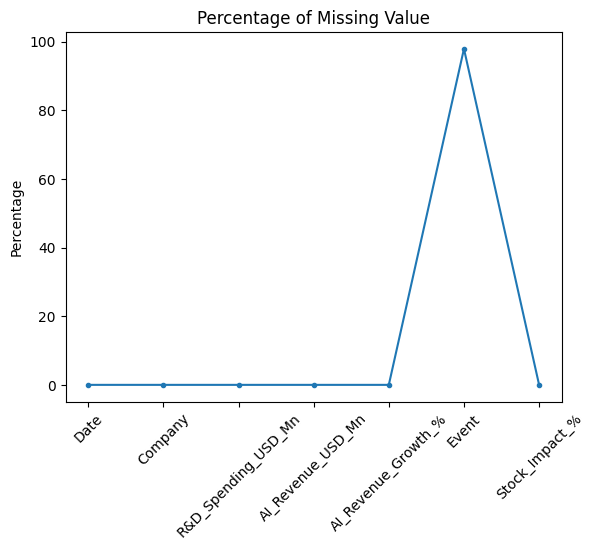

In [3]:
percentage_mv = ai_dataset.isnull().sum() / len(ai_dataset) * 100
plt.title("Percentage of Missing Value")
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.plot(percentage_mv.index,percentage_mv,marker='.')

The "Event" column contains over 90% missing values, so it will be removed from the dataset.

In [4]:
ai_dataset.isnull().sum() / len(ai_dataset) * 100

Date                    0.000000
Company                 0.000000
R&D_Spending_USD_Mn     0.000000
AI_Revenue_USD_Mn       0.000000
AI_Revenue_Growth_%     0.000000
Event                  97.873894
Stock_Impact_%          0.000000
dtype: float64

# 3. EDA

In [5]:
ai_dataset

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22


In [6]:
ai_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [7]:
ai_dataset.describe()

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%
count,10959.000000,10959.000000,10959.000000,10959.000000
mean,65.184504,44.126571,159.395988,0.025560
std,47.918247,41.639356,135.462185,0.749513
min,1.570000,-0.550000,-155.430000,-3.000000
25%,8.640000,3.610000,43.870000,-0.500000
50%,70.960000,35.220000,133.750000,0.000000
75%,99.600000,71.680000,258.300000,0.510000
max,163.830000,155.960000,565.500000,18.500000


In [8]:
print(ai_dataset['Company'].unique())

['OpenAI' 'Google' 'Meta']


In [9]:
# Create a new colum for 'Year' only
ai_dataset['Date'] = pd.to_datetime(ai_dataset['Date'], errors='coerce')
ai_dataset['Year'] = ai_dataset['Date'].dt.year
ai_dataset.head(1)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015


In [10]:
ai_dataset.shape

(10959, 8)

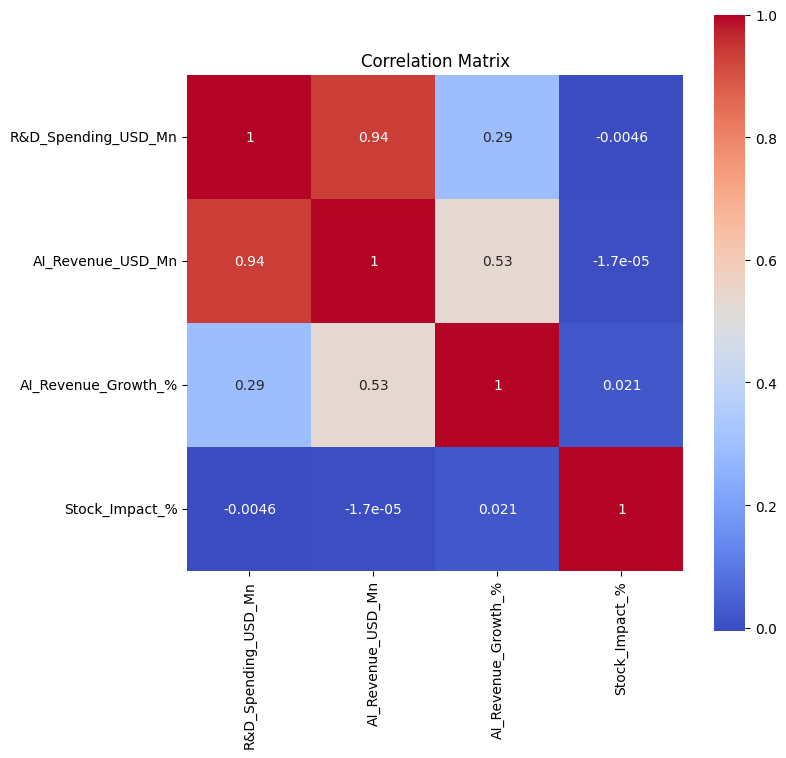

In [11]:
def plotCorrelationMatrix(df, size=8):
	plt.figure(figsize=(size, size))
	corr = df.corr()
	sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
	plt.title('Correlation Matrix')
	plt.show()

plotCorrelationMatrix(ai_dataset[['R&D_Spending_USD_Mn','AI_Revenue_USD_Mn','AI_Revenue_Growth_%','Stock_Impact_%']], 8)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


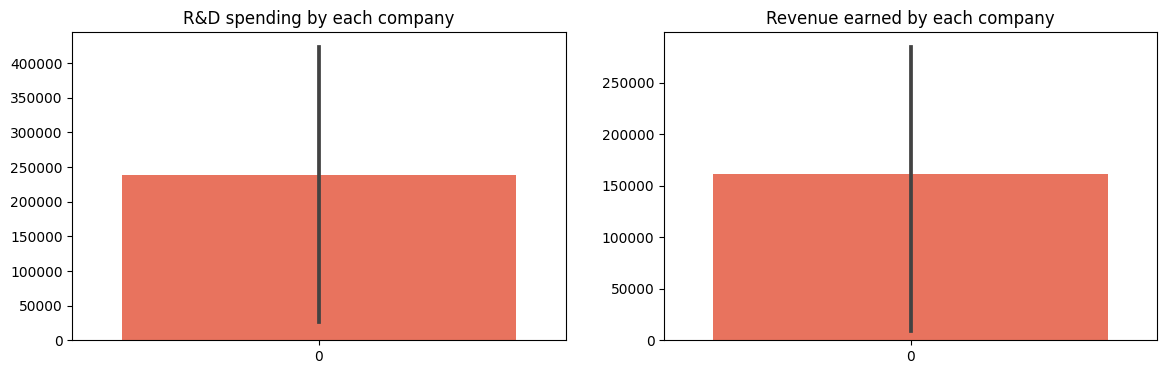

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("R&D spending by each company")
sns.barplot(ai_dataset.groupby('Company')['R&D_Spending_USD_Mn'].sum(), palette=['tomato','b','black'])
plt.subplot(122)
plt.title("Revenue earned by each company")
sns.barplot(ai_dataset.groupby('Company')['AI_Revenue_USD_Mn'].sum(), palette=['tomato','b','black'])
plt.show()

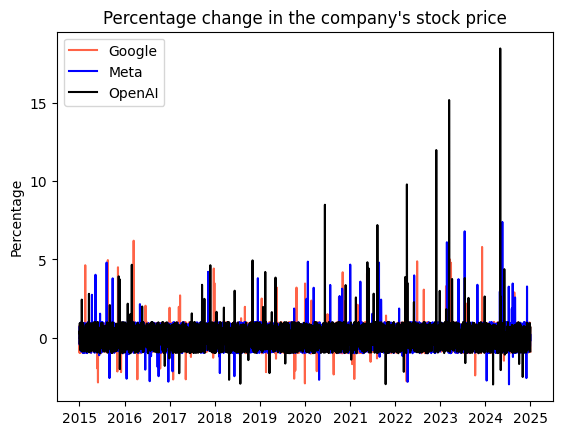

In [13]:
plt.title("Percentage change in the company's stock price")
plt.ylabel("Percentage")
plt.plot(ai_dataset[ai_dataset['Company']=="Google"]['Date'],
            ai_dataset[ai_dataset['Company']=="Google"]["Stock_Impact_%"], color='tomato', label="Google")
plt.plot(ai_dataset[ai_dataset['Company']=="Meta"]['Date'],
            ai_dataset[ai_dataset['Company']=="Meta"]["Stock_Impact_%"], color='b', label="Meta")
plt.plot(ai_dataset[ai_dataset['Company']=="OpenAI"]['Date'],
            ai_dataset[ai_dataset['Company']=="OpenAI"]["Stock_Impact_%"], color='black', label="OpenAI")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

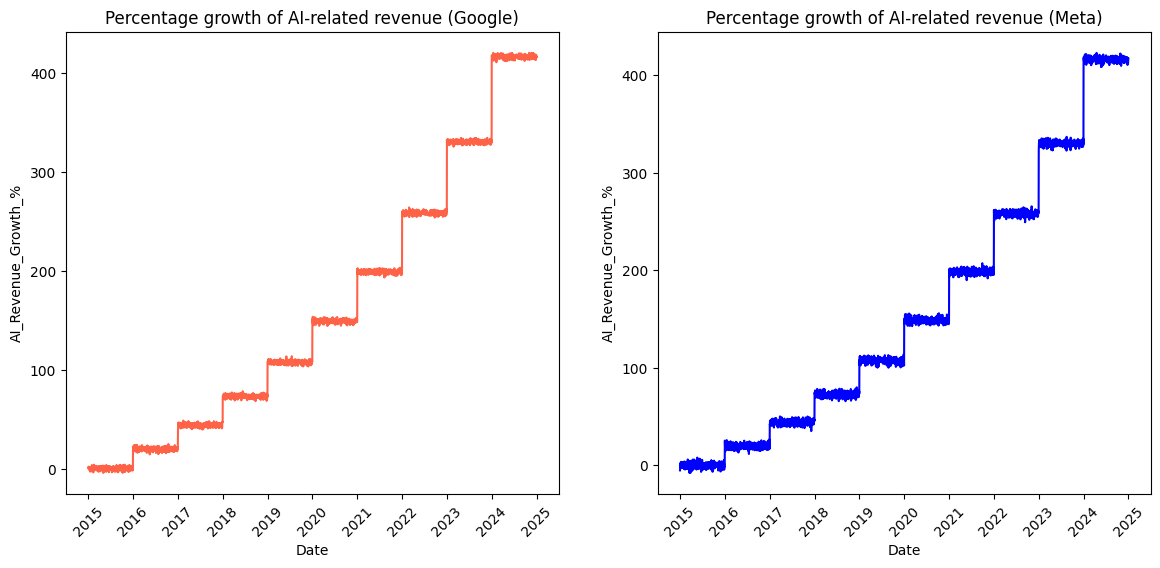

In [14]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.title("Percentage growth of AI-related revenue (Google)")
sns.lineplot(data=ai_dataset[ai_dataset['Company']=='Google'],
                x="Date",
                y="AI_Revenue_Growth_%",
                # hue = "Company",
                color='tomato')
plt.xticks(rotation=45)

plt.subplot(122)
plt.title("Percentage growth of AI-related revenue (Meta)")
sns.lineplot(data=ai_dataset[ai_dataset['Company']=='Meta'],
                x="Date",
                y="AI_Revenue_Growth_%",
                # hue = "Company",
                color='b')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: title={'center': 'Revenue earned by the company each year'}, xlabel='Year', ylabel='AI_Revenue_USD_Mn'>

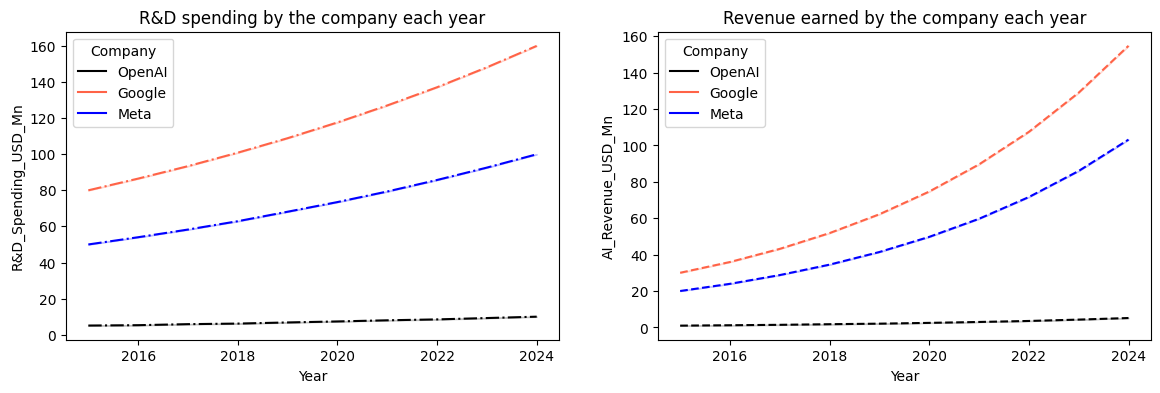

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("R&D spending by the company each year")
sns.lineplot(data=ai_dataset, x='Year', y='R&D_Spending_USD_Mn', hue='Company', palette=['black','tomato','b'], linestyle='-.')
plt.subplot(122)
plt.title("Revenue earned by the company each year")
sns.lineplot(data=ai_dataset, x='Year', y='AI_Revenue_USD_Mn', hue='Company', palette=['black','tomato','b'], linestyle='--')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

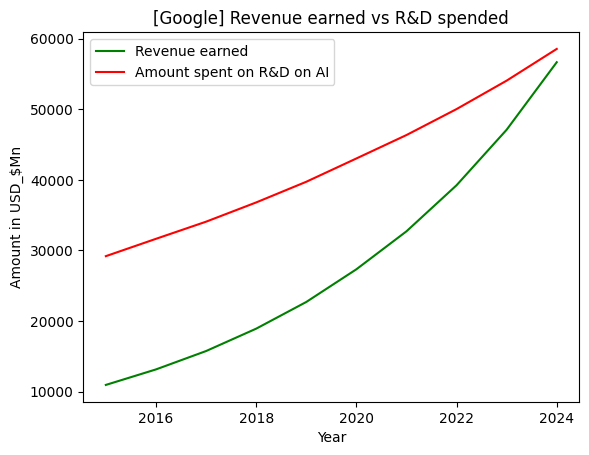

In [16]:
plt.title("[Google] Revenue earned vs R&D spended")
sns.lineplot(data= pd.DataFrame(ai_dataset[ai_dataset['Company']=="Google"].groupby("Year")["AI_Revenue_USD_Mn"].sum()),
             y="AI_Revenue_USD_Mn", x="Year", color="g", label="Revenue earned")
sns.lineplot(data= pd.DataFrame(ai_dataset[ai_dataset['Company']=="Google"].groupby("Year")["R&D_Spending_USD_Mn"].sum()),
             y="R&D_Spending_USD_Mn", x="Year", color="r", label="Amount spent on R&D on AI")
plt.ylabel("Amount in USD_$Mn")
plt.legend()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

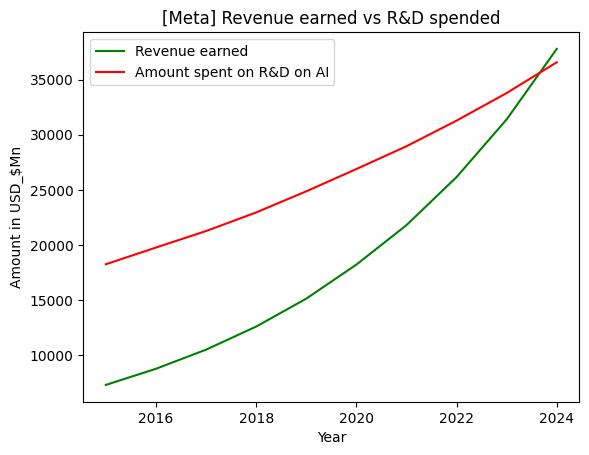

In [17]:
plt.title("[Meta] Revenue earned vs R&D spended")
sns.lineplot(data= pd.DataFrame(ai_dataset[ai_dataset['Company']=="Meta"].groupby("Year")["AI_Revenue_USD_Mn"].sum()),
             y="AI_Revenue_USD_Mn", x="Year", color="g", label="Revenue earned")
sns.lineplot(data= pd.DataFrame(ai_dataset[ai_dataset['Company']=="Meta"].groupby("Year")["R&D_Spending_USD_Mn"].sum()),
             y="R&D_Spending_USD_Mn", x="Year", color="r", label="Amount spent on R&D on AI")
plt.ylabel("Amount in USD_$Mn")
plt.legend()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

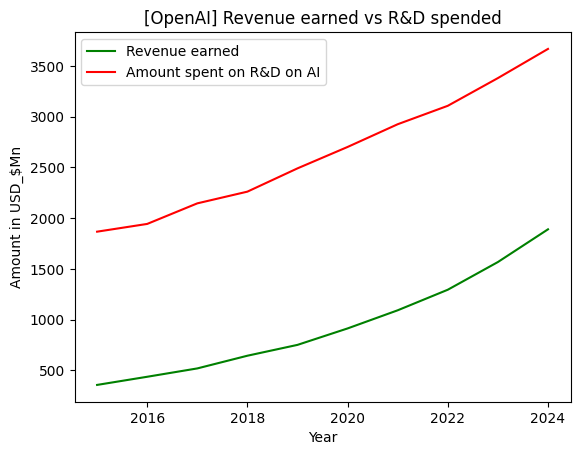

In [18]:
plt.title("[OpenAI] Revenue earned vs R&D spended")
sns.lineplot(data= pd.DataFrame(ai_dataset[ai_dataset['Company']=="OpenAI"].groupby("Year")["AI_Revenue_USD_Mn"].sum()),
             y="AI_Revenue_USD_Mn", x="Year", color="g", label="Revenue earned")
sns.lineplot(data= pd.DataFrame(ai_dataset[ai_dataset['Company']=="OpenAI"].groupby("Year")["R&D_Spending_USD_Mn"].sum()),
             y="R&D_Spending_USD_Mn", x="Year", color="r", label="Amount spent on R&D on AI")
plt.ylabel("Amount in USD_$Mn")
plt.legend()

-   OpenAI is competing in a fast-moving market against giants like Google DeepMind, Anthropic, Meta, and Microsoft.
-   OpenAI can therefore operate at a loss in the short term, because there’s strategic backing that expects future profits.
-   Microsoft invested billions in OpenAI — part in cash, part in Azure credits — to fund R&D.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

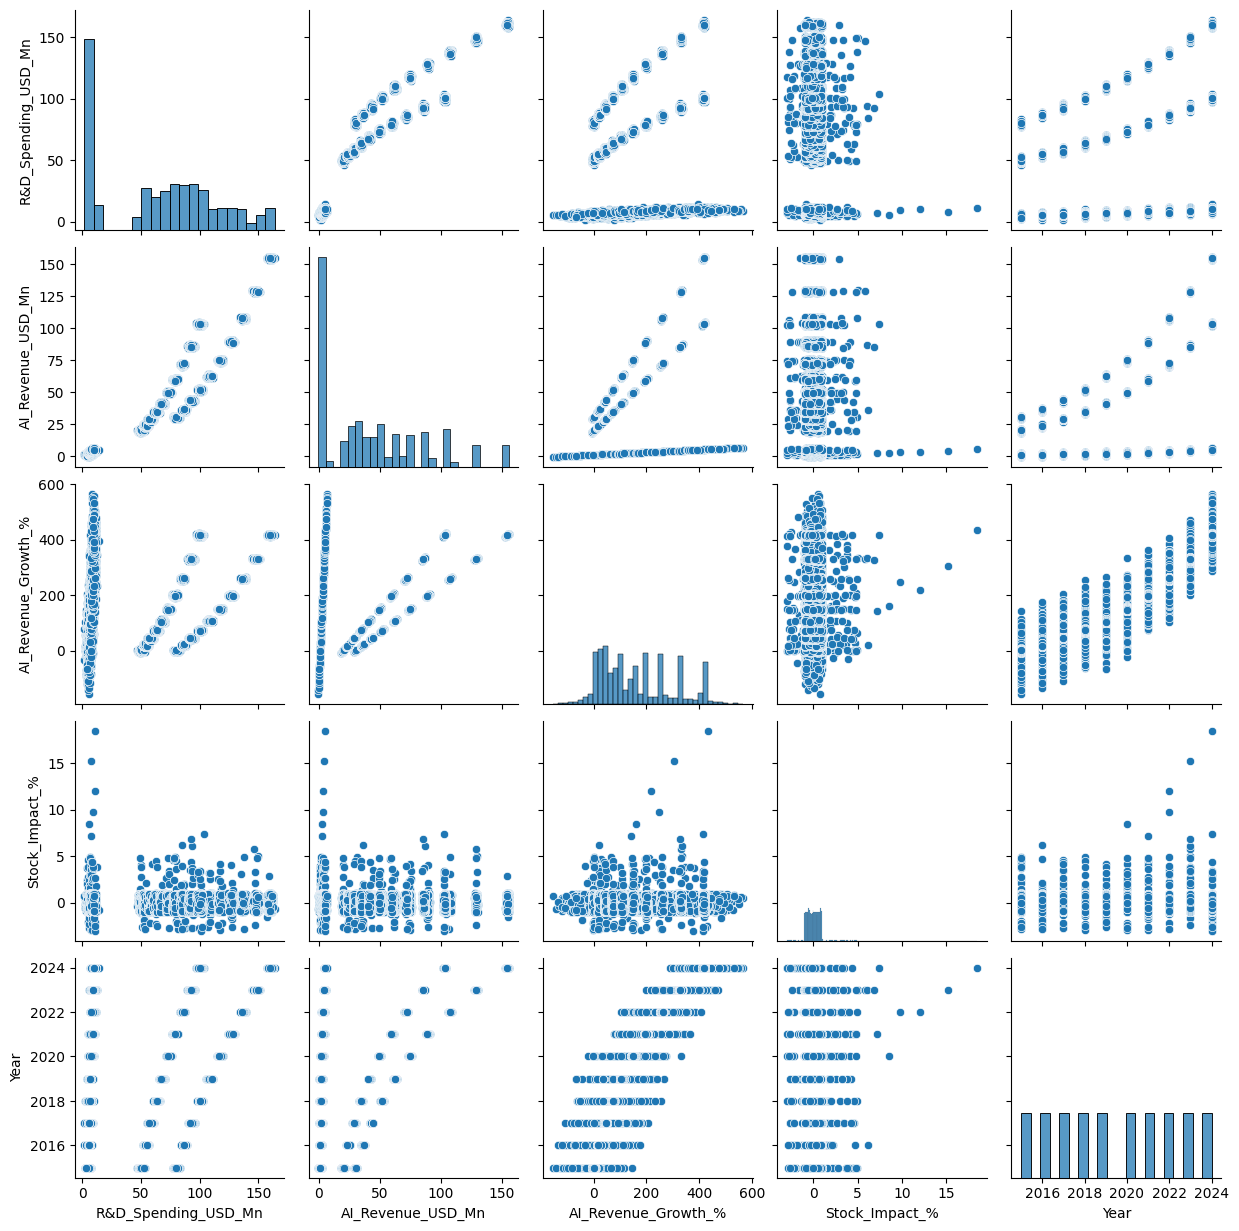

In [19]:
sns.pairplot(ai_dataset)

# 4. Event Impact Analysis

In [20]:
df = pd.read_csv("/kaggle/input/ai-financial-and-market-data/ai_financial_market_daily_realistic_synthetic.csv")
df.sort_values(by="Stock_Impact_%", ascending=False).head(20)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.50
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.20
2890,2022-11-30,OpenAI,10.60,3.18,217.72,ChatGPT (GPT-3.5) launch,12.00
2652,2022-04-06,OpenAI,9.24,3.48,247.93,DALL·E 2 release,9.80
1988,2020-06-11,OpenAI,5.90,2.62,161.56,GPT-3 release,8.50
10731,2024-05-18,Meta,103.64,103.05,415.23,LLaMA 3 release (predicted),7.40
2413,2021-08-10,OpenAI,7.22,2.43,142.76,Codex release,7.20
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.80
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.20
10282,2023-02-24,Meta,93.71,86.98,334.89,LLaMA 1 release,6.10


<Axes: title={'center': '20 most events that significantly move a stock’s price'}, xlabel='Event', ylabel='Stock_Impact_%'>

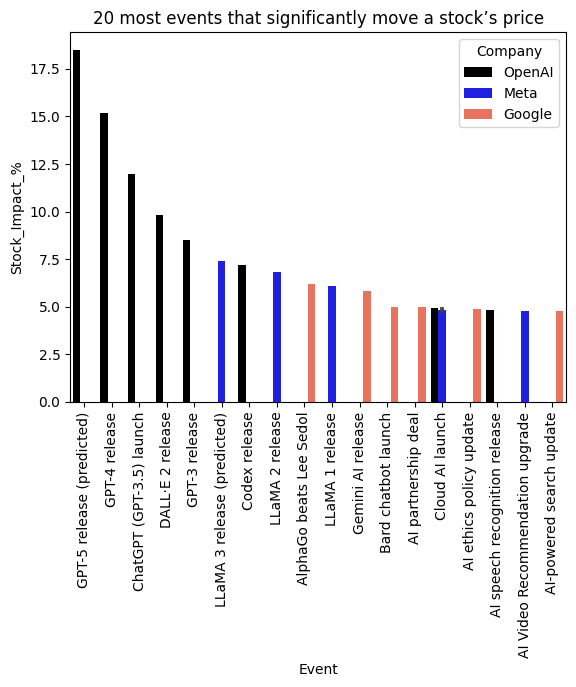

In [21]:
plt.title("20 most events that significantly move a stock’s price")
plt.xticks(rotation=90)
plt.ylabel("Change in Stock %")
sns.barplot(data=df.sort_values(by="Stock_Impact_%", ascending=False).head(20),
            x="Event", y="Stock_Impact_%", hue="Company", palette=['black','b','tomato'])


In [22]:
df.Event.value_counts()

Event
AI speech recognition release      37
AI-powered search update           32
AI Ads Optimization upgrade        32
AI partnership deal                32
AI Video Recommendation upgrade    29
Cloud AI launch                    27
AI ethics policy update            27
TensorFlow open-source release      1
LLaMA 2 release                     1
LLaMA 1 release                     1
Gemini AI release                   1
Bard chatbot launch                 1
MUM Search Model launch             1
BERT for Search launch              1
AlphaGo beats Lee Sedol             1
ChatGPT (GPT-3.5) launch            1
GPT-5 release (predicted)           1
GPT-4 release                       1
DALL·E 2 release                    1
Codex release                       1
GPT-3 release                       1
GPT-2 release                       1
GPT-1 release                       1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

Ten days before and after **TensorFlow open-source release** date

In [23]:
tf = df.loc[3955:3975]
tf

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
3955,2015-10-30,Google,80.33,29.87,-0.43,NaN,0.43
3956,2015-10-31,Google,79.53,30.30,0.99,NaN,-0.84
3957,2015-11-01,Google,80.37,29.86,-0.48,NaN,0.57
3958,2015-11-02,Google,77.89,29.97,-0.10,NaN,0.76
3959,2015-11-03,Google,81.00,29.43,-1.89,NaN,-0.45
3960,2015-11-04,Google,80.70,29.71,-0.96,AI speech recognition release,-2.17
3961,2015-11-05,Google,78.31,30.25,0.85,NaN,0.31
3962,2015-11-06,Google,79.08,29.84,-0.54,NaN,-0.72
3963,2015-11-07,Google,79.65,30.34,1.14,NaN,0.58
3964,2015-11-08,Google,79.63,29.74,-0.86,NaN,-0.61


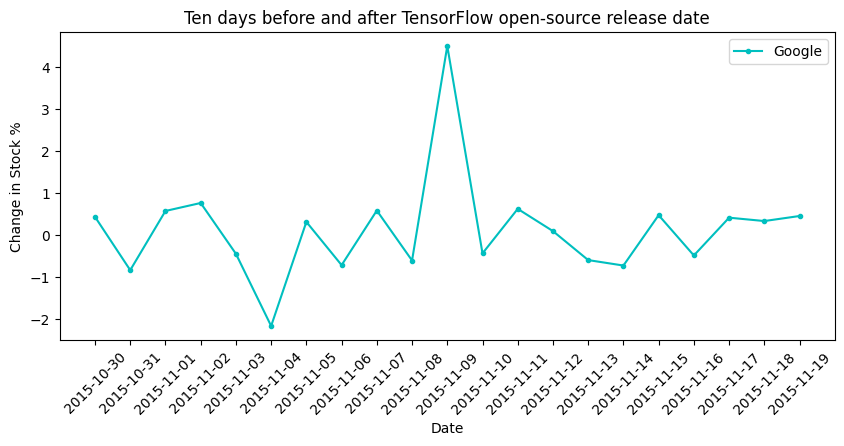

In [24]:
plt.figure(figsize=(10,4))
plt.plot(tf['Date'],tf['Stock_Impact_%'],color='c', marker='.', label='Google')
plt.title("Ten days before and after TensorFlow open-source release date")
plt.xticks(rotation=45)
plt.ylabel("Change in Stock %")
plt.xlabel("Date")
plt.legend()

Ten days before and after **GPT-4 release** date

In [25]:
gpt4 = df.loc[2984:3004]
gpt4

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
2984,2023-03-04,OpenAI,10.59,4.26,326.43,NaN,-0.28
2985,2023-03-05,OpenAI,8.24,3.58,257.92,NaN,-0.48
2986,2023-03-06,OpenAI,9.32,4.21,320.60,NaN,0.89
2987,2023-03-07,OpenAI,8.52,4.13,313.16,NaN,-0.08
2988,2023-03-08,OpenAI,8.90,3.63,263.03,NaN,-0.56
2989,2023-03-09,OpenAI,8.44,4.64,363.84,NaN,0.91
2990,2023-03-10,OpenAI,9.55,4.83,383.49,NaN,-0.02
2991,2023-03-11,OpenAI,8.34,3.95,294.67,NaN,0.19
2992,2023-03-12,OpenAI,8.71,3.57,256.88,NaN,-0.87
2993,2023-03-13,OpenAI,10.61,5.19,419.06,NaN,0.53


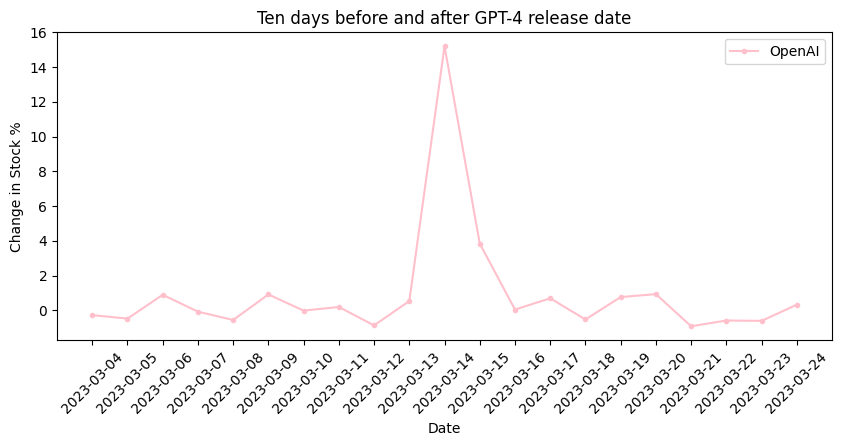

In [26]:
plt.figure(figsize=(10,4))
plt.plot(gpt4['Date'],gpt4['Stock_Impact_%'],color='pink', marker='.', label='OpenAI')
plt.title("Ten days before and after GPT-4 release date")
plt.xticks(rotation=45)
plt.ylabel("Change in Stock %")
plt.xlabel("Date")
plt.legend()

In [27]:
df.sort_values(by="Stock_Impact_%", ascending=True).head(20)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
3350,2024-03-04,OpenAI,10.82,4.77,376.53,AI Ads Optimization upgrade,-3.00
10785,2024-07-11,Meta,100.78,102.92,414.60,AI ethics policy update,-2.99
2480,2021-10-16,OpenAI,8.39,2.78,178.28,AI Ads Optimization upgrade,-2.98
1303,2018-07-27,OpenAI,7.44,0.97,-2.63,AI-powered search update,-2.95
5479,2020-01-01,Google,117.24,74.82,149.41,AI partnership deal,-2.93
3803,2015-05-31,Google,81.14,29.30,-2.32,Cloud AI launch,-2.87
9964,2022-04-12,Meta,84.90,71.99,259.95,AI ethics policy update,-2.83
8026,2016-12-21,Meta,53.18,23.42,17.11,AI-powered search update,-2.82
6303,2022-04-04,Google,138.00,106.81,256.04,AI Video Recommendation upgrade,-2.80
7875,2016-07-23,Meta,53.76,23.97,19.83,AI-powered search update,-2.79


<Axes: title={'center': '13 most events that significantly decrease a stock’s price'}, xlabel='Event', ylabel='Stock_Impact_%'>

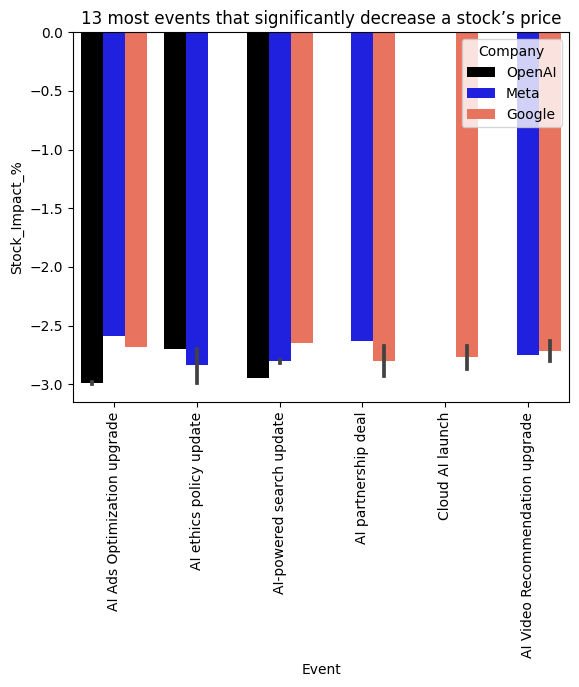

In [28]:
plt.title("13 most events that significantly decrease a stock’s price")
plt.xticks(rotation=90)
plt.ylabel("Change in Stock %")
sns.barplot(data=df.sort_values(by="Stock_Impact_%", ascending=True).head(20),
            x="Event", y="Stock_Impact_%", hue="Company", palette=['black','b','tomato'])

In [29]:
Ads = df.loc[3340:3360]
Ads

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
3340,2024-02-23,OpenAI,11.54,5.04,404.30,NaN,0.47
3341,2024-02-24,OpenAI,10.34,5.08,408.32,NaN,-0.78
3342,2024-02-25,OpenAI,9.89,5.45,445.00,NaN,0.46
3343,2024-02-26,OpenAI,11.33,5.34,434.18,NaN,-0.36
3344,2024-02-27,OpenAI,10.57,4.31,330.67,NaN,-0.71
3345,2024-02-28,OpenAI,10.08,5.63,462.82,NaN,-0.87
3346,2024-02-29,OpenAI,10.55,5.48,447.91,NaN,-0.51
3347,2024-03-01,OpenAI,9.58,4.77,377.11,NaN,-0.21
3348,2024-03-02,OpenAI,9.10,5.68,468.19,NaN,-0.32
3349,2024-03-03,OpenAI,8.70,4.75,374.77,NaN,0.08


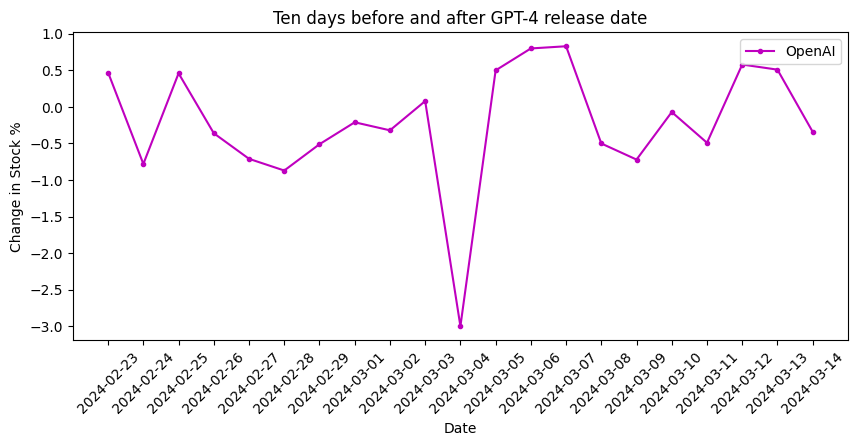

In [30]:
plt.figure(figsize=(10,4))
plt.plot(Ads['Date'],Ads['Stock_Impact_%'],color='m', marker='.', label='OpenAI')
plt.title("Ten days before and after GPT-4 release date")
plt.xticks(rotation=45)
plt.ylabel("Change in Stock %")
plt.xlabel("Date")
plt.legend()

In [31]:
# Daily Average impact on the Stocks of companies
df.groupby('Company')['Stock_Impact_%'].mean()*100

Company
Google    2.620860
Meta      0.976184
OpenAI    4.070901
Name: Stock_Impact_%, dtype: float64

In [32]:
# Daily Average Expenditure on R&D by the companies
df.groupby('Company')['R&D_Spending_USD_Mn'].mean()

Company
Google    115.888623
Meta       72.415294
OpenAI      7.249595
Name: R&D_Spending_USD_Mn, dtype: float64

# 5. Linear Regression

Since AI revenue and R&D spending have a strong correlation of 0.94, I’ll use these two variables in my model.

## 5.1 Google

In [33]:
google_dataset = ai_dataset[ai_dataset["Company"]=="Google"]
meta_dataset = ai_dataset[ai_dataset["Company"]=="Meta"]
openai_dataset = ai_dataset[ai_dataset["Company"]=="OpenAI"]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

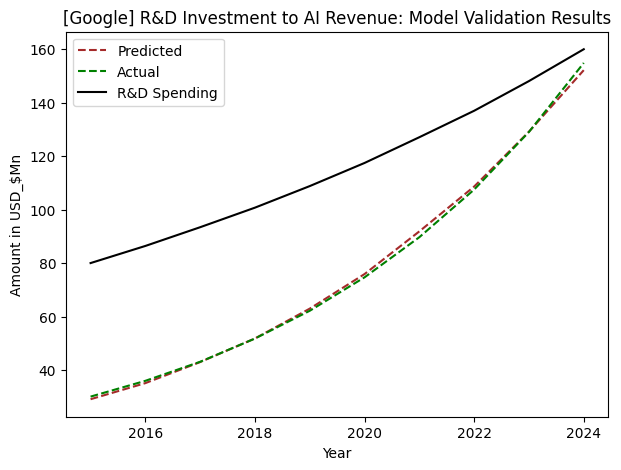

MAE: 2.827642368149688
MSE: 12.305429775600219
RMSE: 3.507909601970983
R^2 Score: 0.9912089724910013


In [34]:
# Create Training Set
x = google_dataset[["Year","R&D_Spending_USD_Mn"]].values  # keep shape (n_samples, 2)
y = google_dataset["AI_Revenue_USD_Mn"].values  # 1D array

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Training Model
google_model = LinearRegression()
google_model.fit(x_train, y_train)

# Testing Model
y_pred = google_model.predict(x_test)

# Prepare DataFrame of actual vs predicted
df_results = pd.DataFrame({
    "Year": x_test[:, 0],
    "R&D_Spending_USD_Mn": x_test[:, 1],
    "y_actual": y_test,
    "y_predict": y_pred,
    "residual": y_test - y_pred
}).reset_index(drop=True)

# Plot
plt.figure(figsize=(7, 5))
plt.title("[Google] R&D Investment to AI Revenue: Model Validation Results")
sns.lineplot(data=df_results.groupby("Year").mean(),
             x="Year",
             y="y_predict", 
             linestyle='--', color='brown', label="Predicted")
sns.lineplot(data=df_results.groupby("Year").mean(),
             x="Year",
             y="y_actual", 
             linestyle='--', color='g', label='Actual')
sns.lineplot(data=df_results.groupby("Year").mean(),
             x="Year",
             y="R&D_Spending_USD_Mn", 
             color='black', label='R&D Spending')
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")
plt.legend()
plt.show()

# MAE
print(f'MAE: {metrics.mean_absolute_error(y_test,y_pred)}')
# MSE
print(f'MSE: {metrics.mean_squared_error(y_test,y_pred)}')
# RMSE
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
# R^2
print(f'R^2 Score: {metrics.r2_score(y_test, y_pred)}')


## 5.2 OpenAI

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

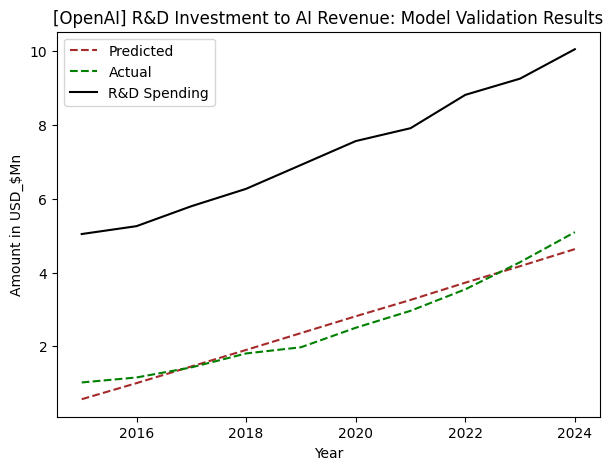

MAE: 0.4737267732038116
MSE: 0.3465913766369836
RMSE: 0.5887201174046829
R^2 Score: 0.8284851199438961


In [35]:
# Create Training Set
x = openai_dataset[["Year","R&D_Spending_USD_Mn"]].values  # keep shape (n_samples, 2)
y = openai_dataset["AI_Revenue_USD_Mn"].values  # 1D array

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training Model
openai_model = LinearRegression()
openai_model.fit(x_train, y_train)

# Testing Model
y_pred = openai_model.predict(x_test)

# Prepare DataFrame of actual vs predicted
df_results = pd.DataFrame({
    "Year": x_test[:, 0],
    "R&D_Spending_USD_Mn": x_test[:, 1],
    "y_actual": y_test,
    "y_predict": y_pred,
    "residual": y_test - y_pred
}).reset_index(drop=True)

# Plot
plt.figure(figsize=(7, 5))
plt.title("[OpenAI] R&D Investment to AI Revenue: Model Validation Results")
sns.lineplot(data=df_results.groupby("Year").mean(),
             x="Year",
             y="y_predict", 
             linestyle='--', color='brown', label="Predicted")
sns.lineplot(data=df_results.groupby("Year").mean(),
             x="Year",
             y="y_actual", 
             linestyle='--', color='g', label='Actual')
sns.lineplot(data=df_results.groupby("Year").mean(),
             x="Year",
             y="R&D_Spending_USD_Mn", 
             color='black', label='R&D Spending')
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")
plt.legend()
plt.show()

# MAE
print(f'MAE: {metrics.mean_absolute_error(y_test,y_pred)}')
# MSE
print(f'MSE: {metrics.mean_squared_error(y_test,y_pred)}')
# RMSE
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
# R^2
print(f'R^2 Score: {metrics.r2_score(y_test, y_pred)}')


## 5.3 Meta

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

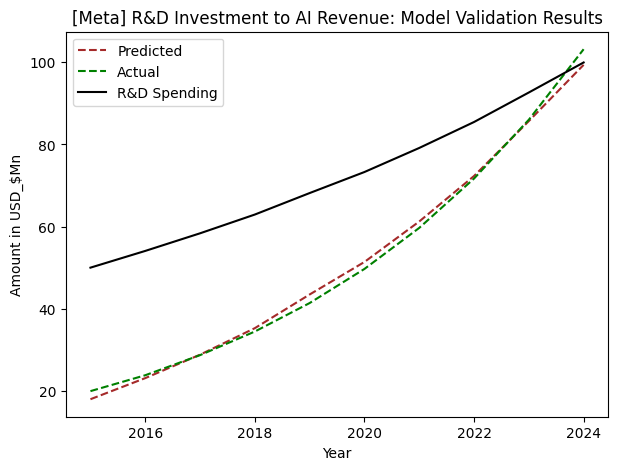

MAE: 2.5668241604044417
MSE: 10.481935873975209
RMSE: 3.2375817941752776
R^2 Score: 0.9855674017666727


In [36]:
# Create Training Set
x = meta_dataset[["Year","R&D_Spending_USD_Mn"]].values  # keep shape (n_samples, 2)
y = meta_dataset["AI_Revenue_USD_Mn"].values  # 1D array

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training Model
meta_model = LinearRegression()
meta_model.fit(x_train, y_train)

# Testing Model
y_pred = meta_model.predict(x_test)

# Prepare DataFrame of actual vs predicted
df_results = pd.DataFrame({
    "Year": x_test[:, 0],
    "R&D_Spending_USD_Mn": x_test[:, 1],
    "y_actual": y_test,
    "y_predict": y_pred,
    "residual": y_test - y_pred
}).reset_index(drop=True)

# Plot
plt.figure(figsize=(7, 5))
plt.title("[Meta] R&D Investment to AI Revenue: Model Validation Results")
sns.lineplot(data=df_results.groupby("Year").mean(),
             x="Year",
             y="y_predict", 
             linestyle='--', color='brown', label="Predicted")
sns.lineplot(data=df_results.groupby("Year").mean(),
             x="Year",
             y="y_actual", 
             linestyle='--', color='g', label='Actual')
sns.lineplot(data=df_results.groupby("Year").mean(),
             x="Year",
             y="R&D_Spending_USD_Mn", 
             color='black', label='R&D Spending')
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")
plt.legend()
plt.show()

# MAE
print(f'MAE: {metrics.mean_absolute_error(y_test,y_pred)}')
# MSE
print(f'MSE: {metrics.mean_squared_error(y_test,y_pred)}')
# RMSE
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
# R^2
print(f'R^2 Score: {metrics.r2_score(y_test, y_pred)}')


# 6. Prediction

=== FUTURE AI REVENUE PREDICTIONS (2025-2030) ===

Prediction based on historical R&D spending trend:

Meta:
   Year  Predicted_RD_Spending_Mn  Predicted_AI_Revenue_Mn
0  2025                    102.77                   101.22
1  2026                    108.29                   110.19
2  2027                    113.81                   119.16
3  2028                    119.33                   128.13
4  2029                    124.85                   137.11
5  2030                    130.38                   146.08

OpenAI:
    Year  Predicted_RD_Spending_Mn  Predicted_AI_Revenue_Mn
6   2025                     10.28                     5.08
7   2026                     10.83                     5.53
8   2027                     11.39                     5.98
9   2028                     11.94                     6.43
10  2029                     12.49                     6.88
11  2030                     13.04                     7.34

Google:
    Year  Predicted_RD_Spending_Mn  Pred

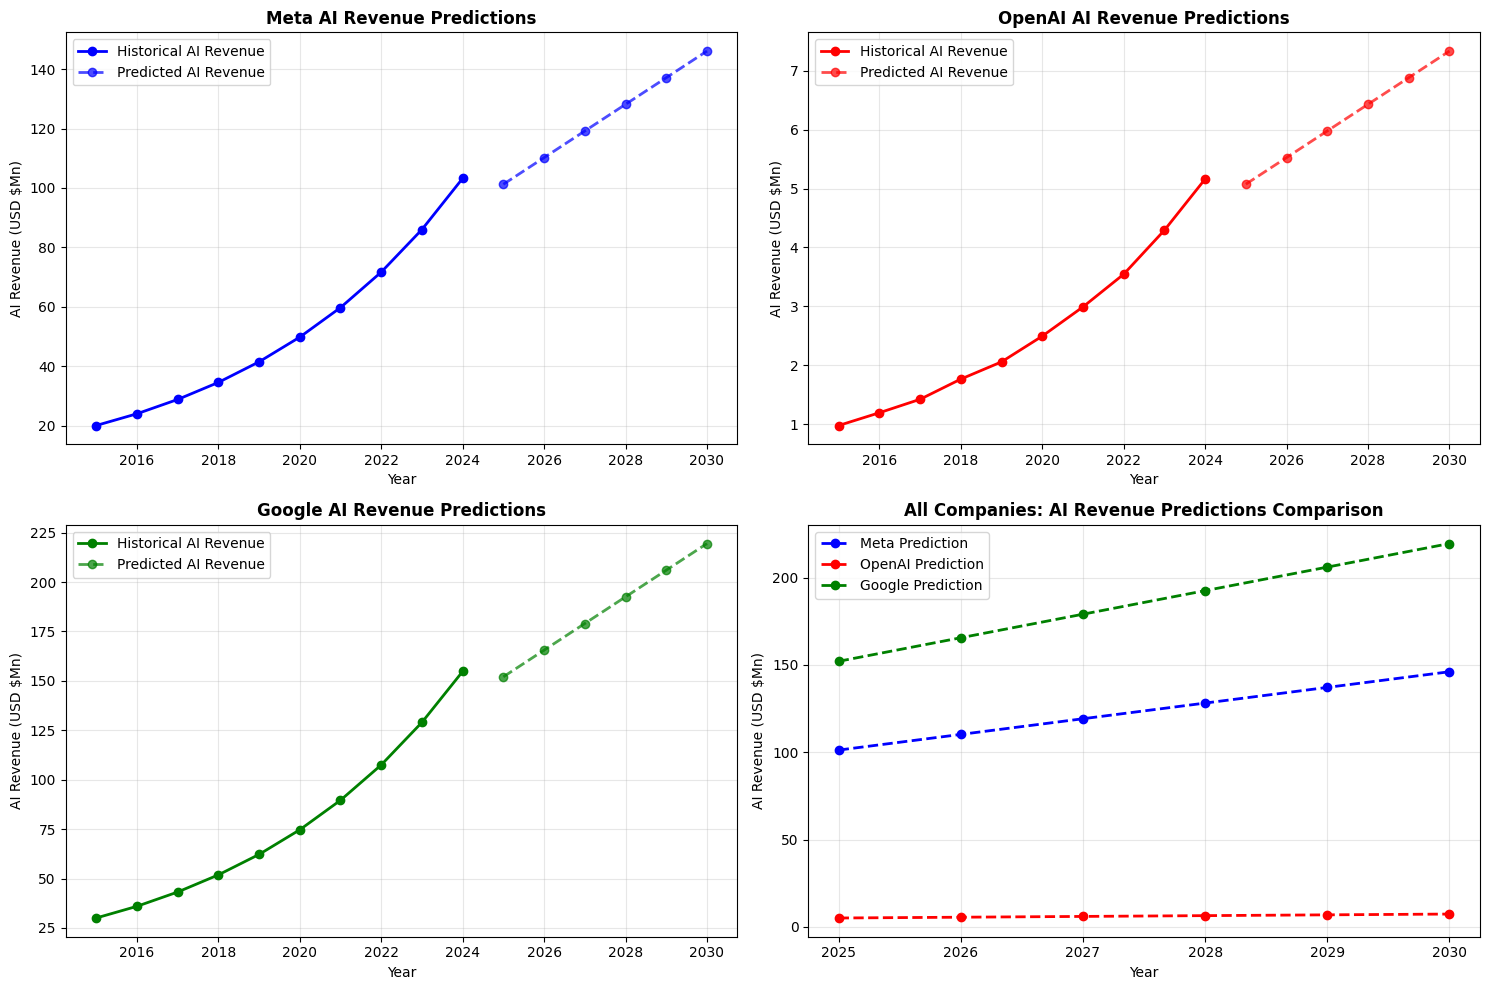


KEY INSIGHTS:
Meta: 2030 Revenue $146.1M | Avg Annual Growth: 5.9%
OpenAI: 2030 Revenue $7.3M | Avg Annual Growth: 6.9%
Google: 2030 Revenue $219.5M | Avg Annual Growth: 6.0%


In [37]:
# Method 1: Predict for all companies with historical trend
def predict_future_revenue_for_all_companies():
    results = {}
    models = {'Meta': meta_model, 'OpenAI': openai_model, 'Google': google_model}
    
    for company, model in models.items():
        # Get company-specific historical data
        company_data = ai_dataset[ai_dataset['Company'] == company].groupby('Year').agg({
            'R&D_Spending_USD_Mn': 'mean',
            'AI_Revenue_USD_Mn': 'mean'
        }).reset_index()
        
        # Fit trend line for R&D spending
        years_hist = company_data['Year'].values.reshape(-1, 1)
        rd_spending_hist = company_data['R&D_Spending_USD_Mn'].values
        
        rd_trend_model = LinearRegression()
        rd_trend_model.fit(years_hist, rd_spending_hist)
        
        # Predict future years
        future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030])
        future_years_reshaped = future_years.reshape(-1, 1)
        
        # Predict R&D spending for future years
        future_rd_spending = rd_trend_model.predict(future_years_reshaped)
        
        # Ensure no negative R&D spending
        future_rd_spending = np.maximum(future_rd_spending, 0)
        
        # Create feature matrix for AI revenue prediction
        future_features = np.column_stack([future_years, future_rd_spending])
        
        # Predict AI revenue
        future_revenue = model.predict(future_features)
        
        # Ensure no negative revenue
        future_revenue = np.maximum(future_revenue, 0)
        
        results[company] = pd.DataFrame({
            'Year': future_years,
            'Company': company,
            'Predicted_RD_Spending_Mn': future_rd_spending,
            'Predicted_AI_Revenue_Mn': future_revenue
        })
    
    return pd.concat(results.values(), ignore_index=True)

# Method 2: User-defined R&D spending scenarios
def predict_with_custom_rd_spending(rd_spending_values):
    """
    Predict AI revenue with custom R&D spending values
    rd_spending_values: list of 6 values for 2025-2030
    """
    future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030])
    future_features = np.column_stack([future_years, rd_spending_values])
    future_revenue = model.predict(future_features)
    
    return pd.DataFrame({
        'Year': future_years,
        'RD_Spending_Mn': rd_spending_values,
        'Predicted_AI_Revenue_Mn': future_revenue
    })

# Execute predictions
print("=== FUTURE AI REVENUE PREDICTIONS (2025-2030) ===\n")

# Method 1: Trend-based prediction for all companies
future_predictions_all = predict_future_revenue_for_all_companies()
print("Prediction based on historical R&D spending trend:")
for company in ['Meta', 'OpenAI', 'Google']:
    company_predictions = future_predictions_all[future_predictions_all['Company'] == company]
    print(f"\n{company}:")
    print(company_predictions[['Year', 'Predicted_RD_Spending_Mn', 'Predicted_AI_Revenue_Mn']].round(2))

# Method 2: Custom scenarios for each company
def predict_custom_scenarios():
    # Example: Different growth rates per company
    current_rd_meta = ai_dataset[ai_dataset['Company'] == 'Meta']['R&D_Spending_USD_Mn'].iloc[-1]
    current_rd_openai = ai_dataset[ai_dataset['Company'] == 'OpenAI']['R&D_Spending_USD_Mn'].iloc[-1]
    current_rd_google = ai_dataset[ai_dataset['Company'] == 'Google']['R&D_Spending_USD_Mn'].iloc[-1]
    
    conservative_scenarios = {
        'Meta': [current_rd_meta * (1.08 ** i) for i in range(1, 7)],      # 8% growth
        'OpenAI': [current_rd_openai * (1.15 ** i) for i in range(1, 7)],  # 15% growth  
        'Google': [current_rd_google * (1.12 ** i) for i in range(1, 7)]   # 12% growth
    }
    
    return conservative_scenarios

custom_rd_scenarios = predict_custom_scenarios()
print("\n\nConservative Scenario (Company-specific growth rates):")
for company, rd_values in custom_rd_scenarios.items():
    model = {'Meta': meta_model, 'OpenAI': openai_model, 'Google': google_model}[company]
    future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030])
    future_features = np.column_stack([future_years, rd_values])
    future_revenue = model.predict(future_features)
    future_revenue = np.maximum(future_revenue, 0)  # Prevent negative values
    
    results_df = pd.DataFrame({
        'Year': future_years,
        'RD_Spending_Mn': rd_values,
        'Predicted_AI_Revenue_Mn': future_revenue
    })
    print(f"\n{company}:")
    print(results_df.round(2))

# Visualization for all companies
plt.figure(figsize=(15, 10))

# Get historical data for each company
companies = ['Meta', 'OpenAI', 'Google']
colors = ['blue', 'red', 'green']

for i, company in enumerate(companies):
    plt.subplot(2, 2, i+1)
    
    # Historical data
    historical_data = ai_dataset[ai_dataset['Company'] == company].groupby('Year').agg({
        'R&D_Spending_USD_Mn': 'mean',
        'AI_Revenue_USD_Mn': 'mean'
    }).reset_index()
    
    # Future predictions
    company_predictions = future_predictions_all[future_predictions_all['Company'] == company]
    
    # Plot
    plt.plot(historical_data['Year'], historical_data['AI_Revenue_USD_Mn'], 
             'o-', color=colors[i], linewidth=2, label='Historical AI Revenue')
    plt.plot(company_predictions['Year'], company_predictions['Predicted_AI_Revenue_Mn'], 
             'o--', color=colors[i], linewidth=2, alpha=0.7, label='Predicted AI Revenue')
    
    plt.title(f'{company} AI Revenue Predictions', fontsize=12, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('AI Revenue (USD $Mn)')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Combined comparison plot
plt.subplot(2, 2, 4)
for i, company in enumerate(companies):
    company_predictions = future_predictions_all[future_predictions_all['Company'] == company]
    plt.plot(company_predictions['Year'], company_predictions['Predicted_AI_Revenue_Mn'], 
             'o--', color=colors[i], linewidth=2, label=f'{company} Prediction')

plt.title('All Companies: AI Revenue Predictions Comparison', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('AI Revenue (USD $Mn)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary insights
print("\nKEY INSIGHTS:")
for company in companies:
    company_predictions = future_predictions_all[future_predictions_all['Company'] == company]
    historical_data = ai_dataset[ai_dataset['Company'] == company]
    
    latest_historical_revenue = historical_data['AI_Revenue_USD_Mn'].iloc[-1]
    predicted_2030_revenue = company_predictions.iloc[-1]['Predicted_AI_Revenue_Mn']
    
    if latest_historical_revenue > 0:
        growth_rate = ((predicted_2030_revenue / latest_historical_revenue) ** (1/6) - 1) * 100
        print(f"{company}: 2030 Revenue ${predicted_2030_revenue:.1f}M | Avg Annual Growth: {growth_rate:.1f}%")
    else:
        print(f"{company}: 2030 Revenue ${predicted_2030_revenue:.1f}M")